<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

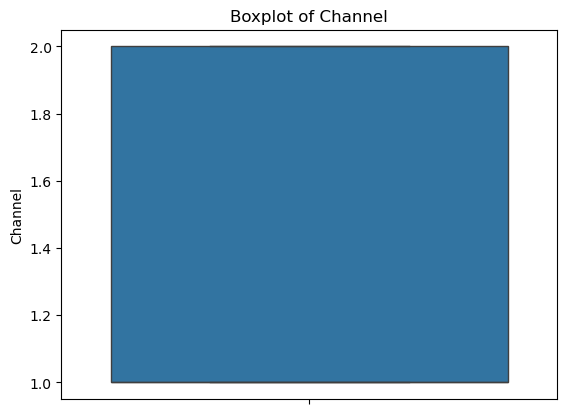

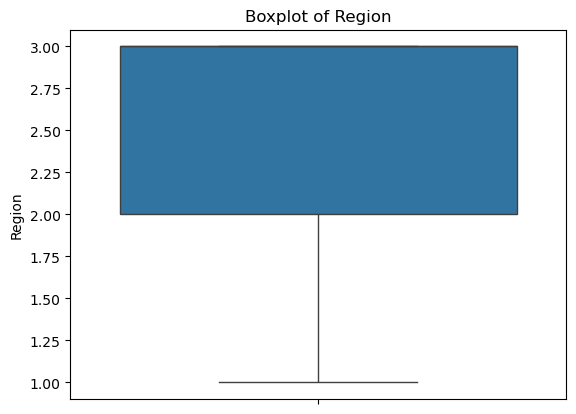

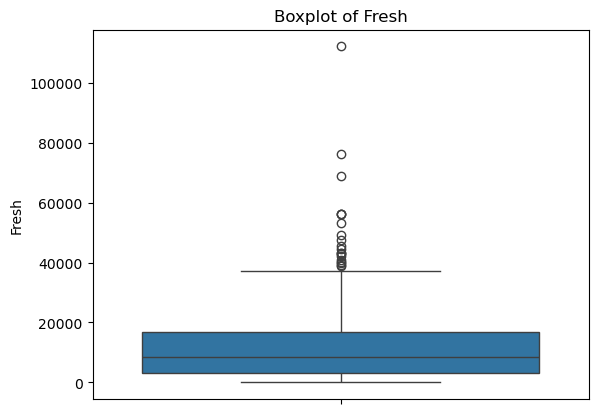

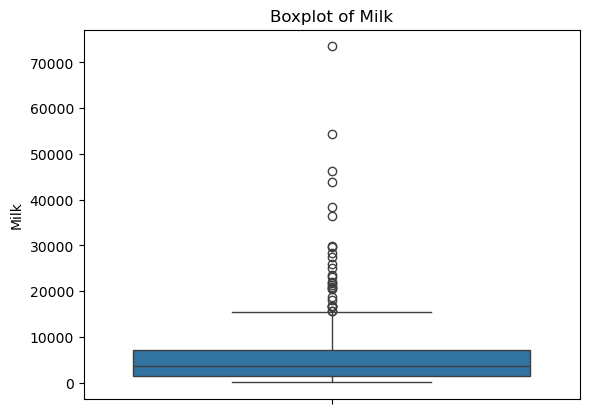

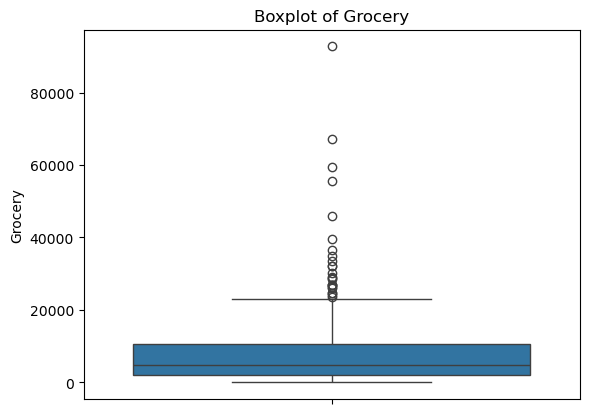

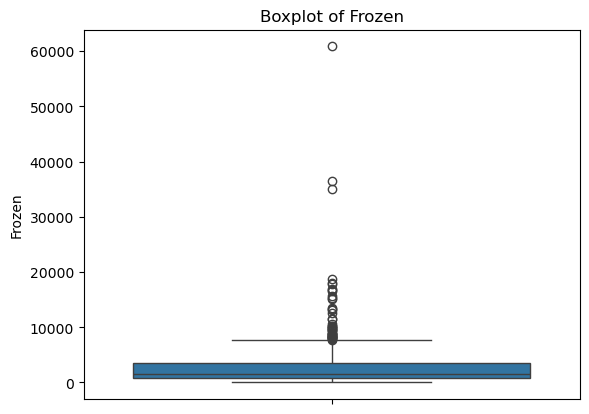

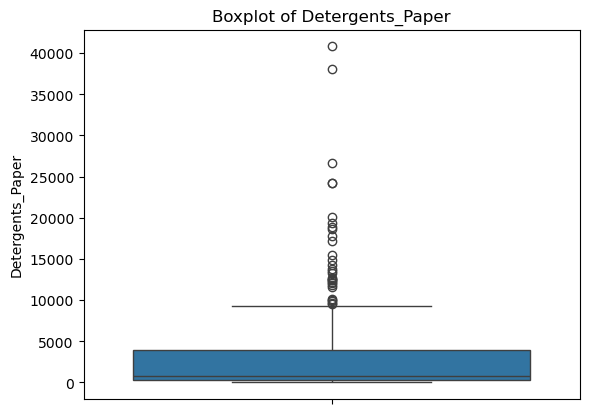

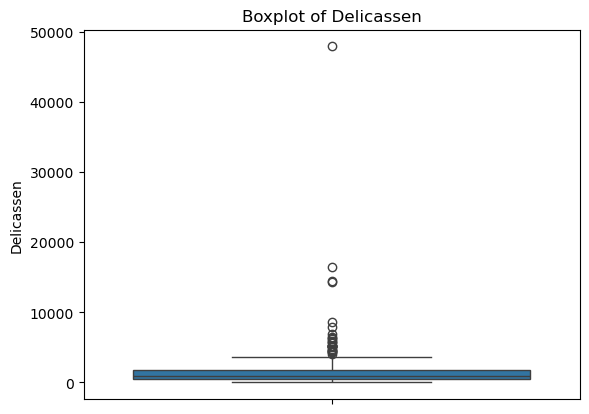

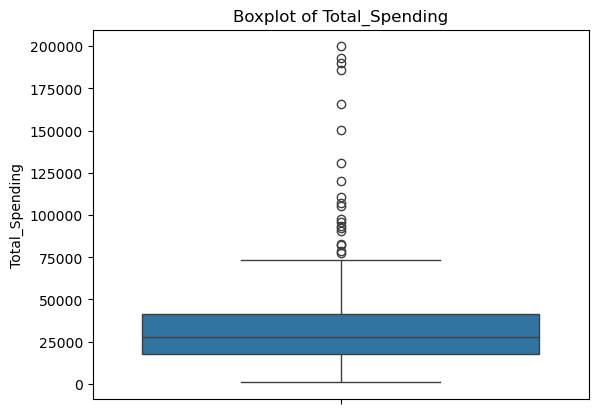

In [51]:
# loading the data: Wholesale customers data



# Load the CSV file into a DataFrame
Wholesale_customers_df = pd.read_csv(r"C:\Users\sombe\Downloads\Wholesale customers data.csv")

print(Wholesale_customers_df.head())

# Create a variable that can relate to Revenue
# Calculate Total Spending
Wholesale_customers_df['Total_Spending'] = Wholesale_customers_df[
    ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
].sum(axis=1)

print(Wholesale_customers_df.info())

print(Wholesale_customers_df.isnull().sum())

print(Wholesale_customers_df.duplicated().sum())

Wholesale_customers_df = Wholesale_customers_df.drop_duplicates()

import seaborn as sns
import matplotlib.pyplot as plt

for col in Wholesale_customers_df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(Wholesale_customers_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
 8   Total_Spending    440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB
None
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4      

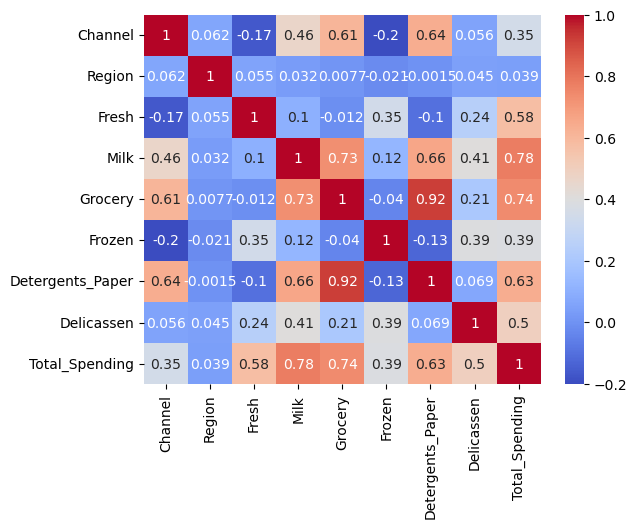

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  Total_Spending  
count    440.000000        440.000000    440.000000      440.000000  
mean    3071.931818       2881.493182   1524.870455    33226.136364  
std     4854.673333       4767.854448   2820.105937    26356.301730  
min       25.000000          3.0000

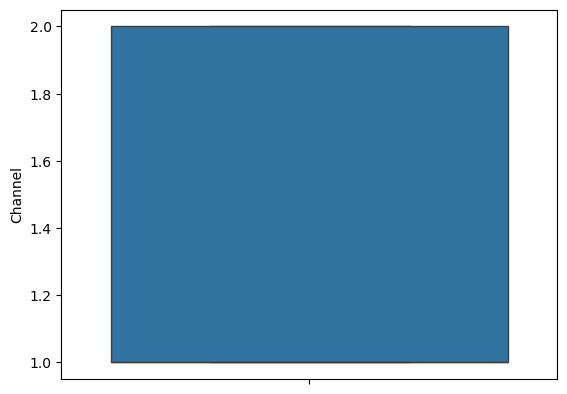

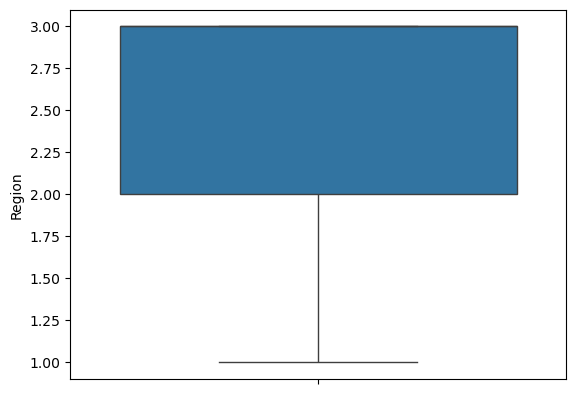

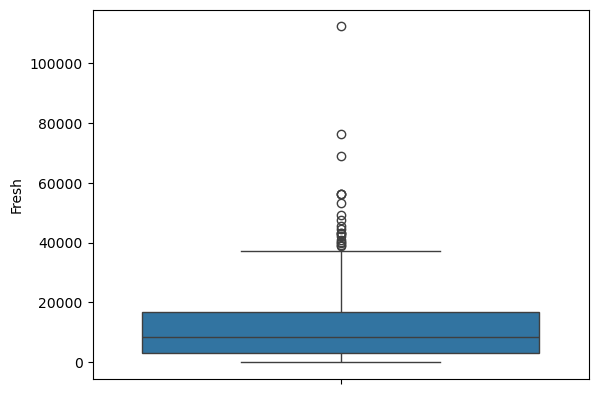

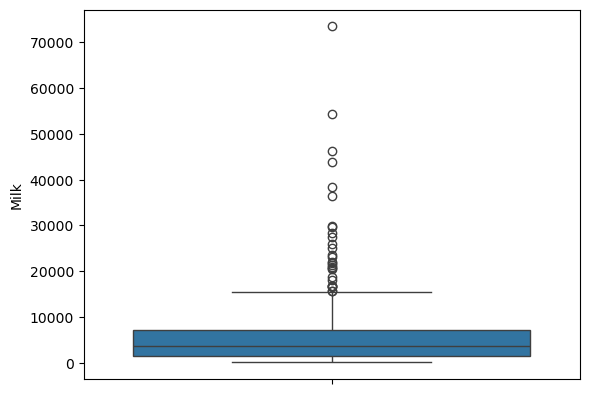

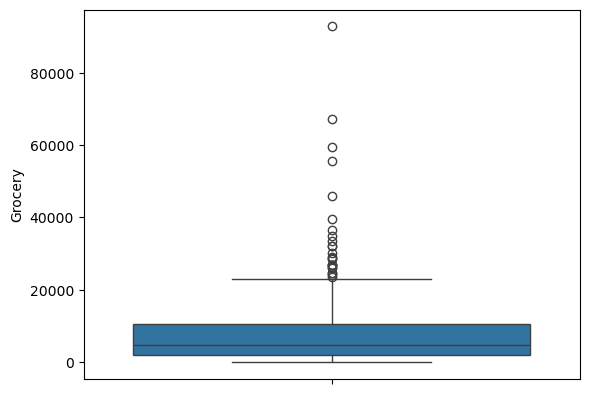

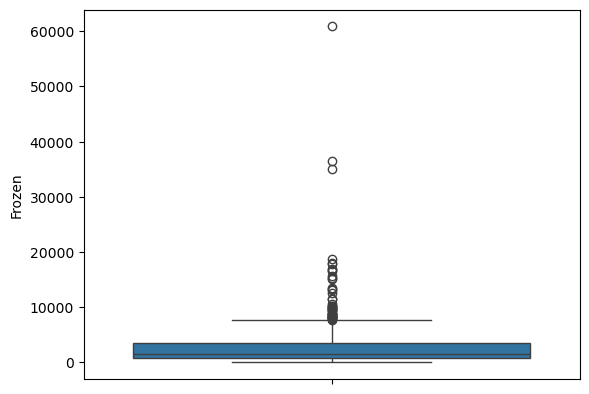

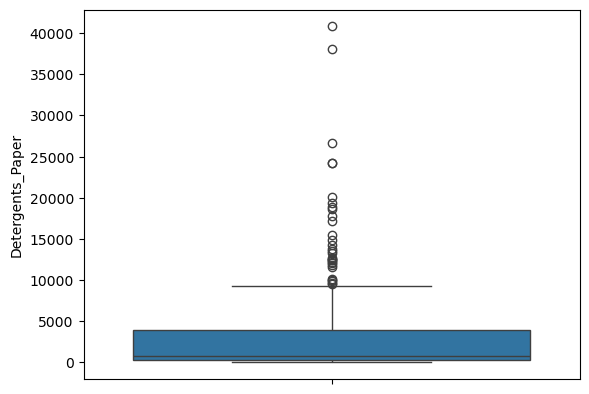

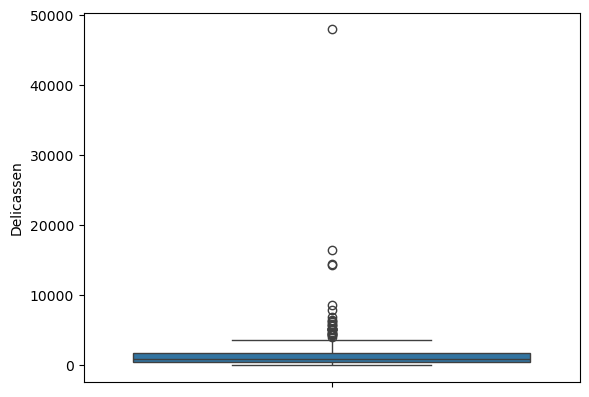

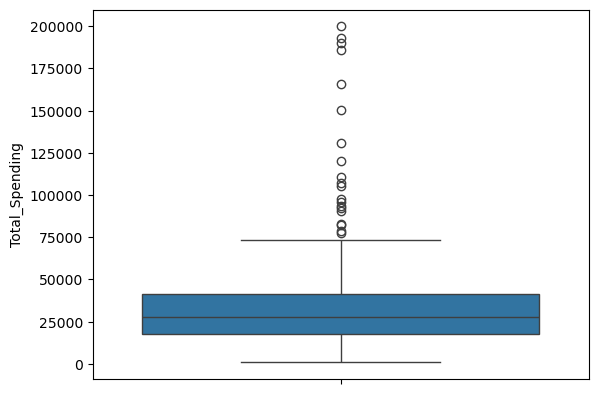

Channel             0.950652
Region             -1.273991
Fresh               1.079902
Milk                1.006195
Grocery             1.204142
Frozen              1.347470
Detergents_Paper    1.242993
Delicassen          1.034561
Total_Spending      0.638693
dtype: float64


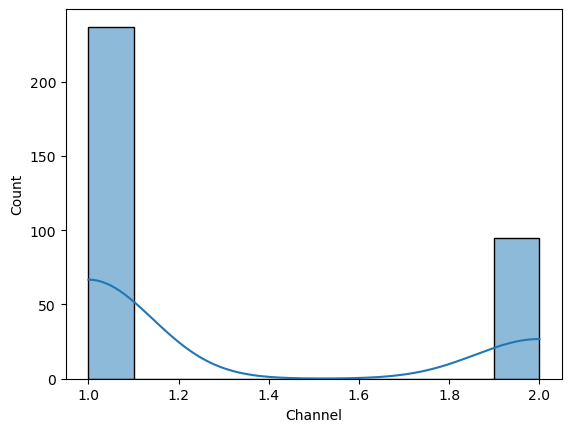

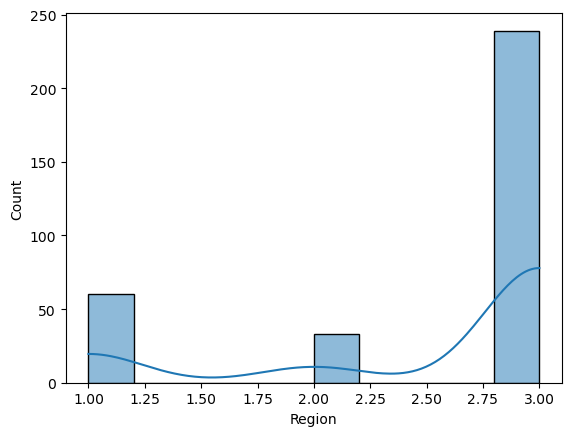

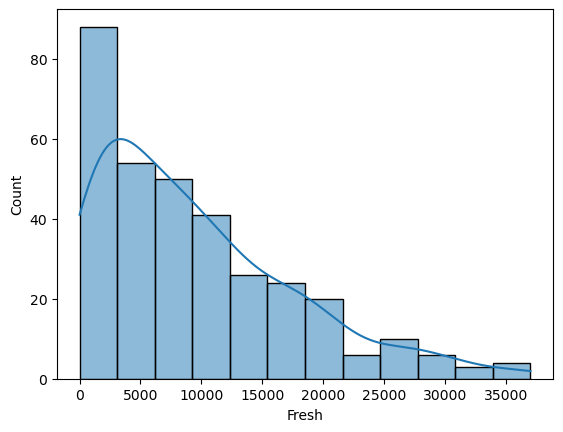

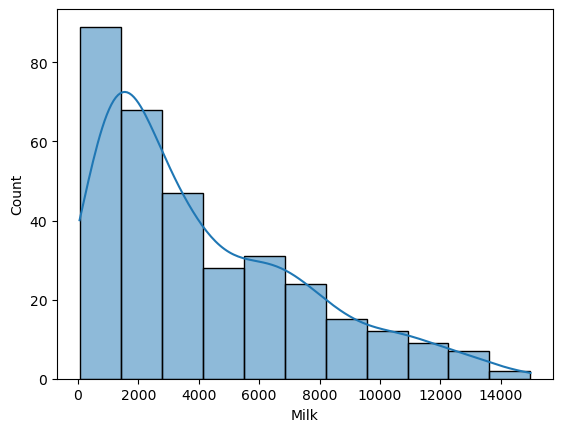

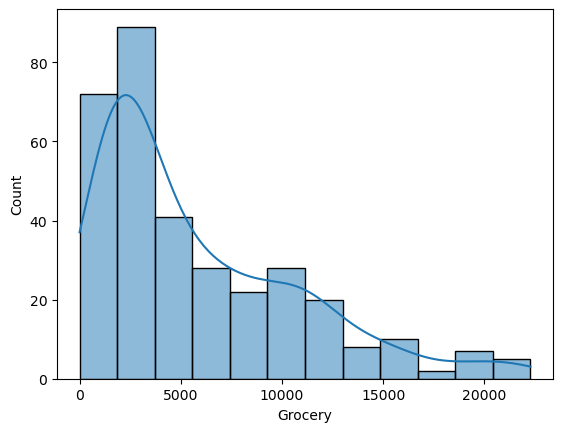

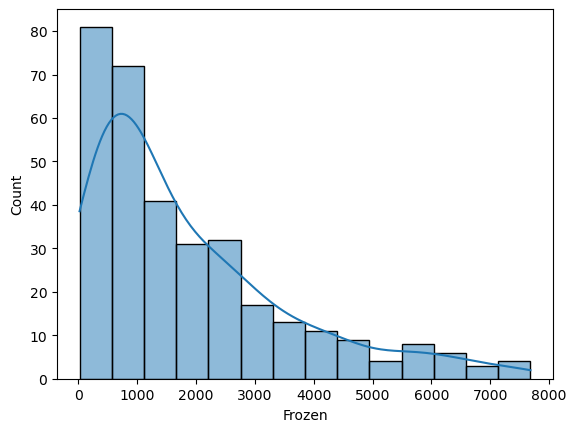

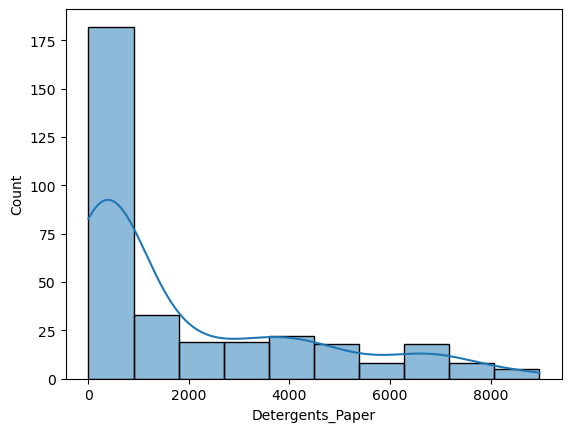

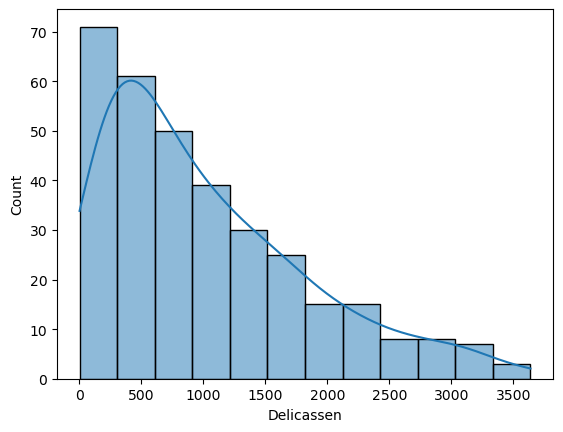

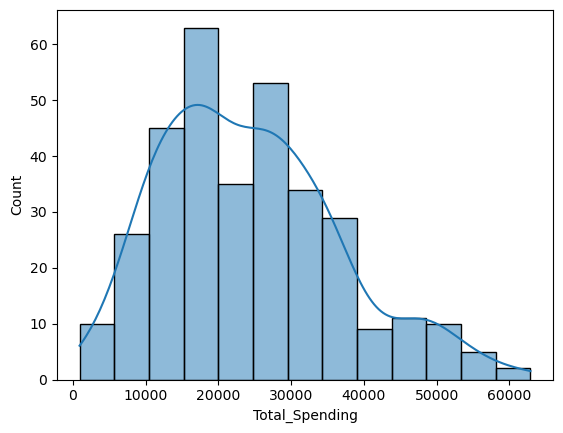

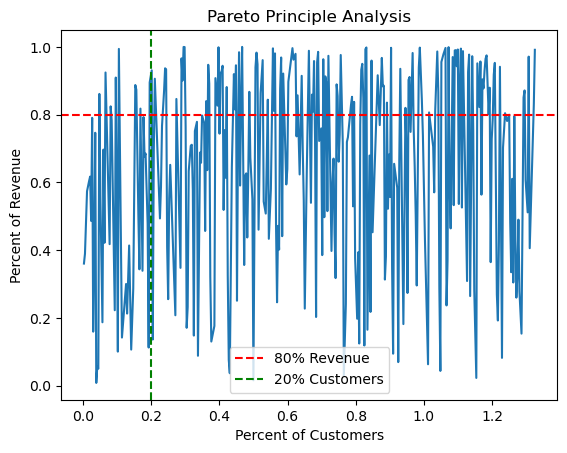

In [49]:
# Your code here:

# Understand Each Column
print(Wholesale_customers_df.info())        # Column types and non-null counts
print(Wholesale_customers_df.head())        # First few rows
print(Wholesale_customers_df.describe())    # Summary statistics

# Identify Categorical Data to Convert
#There is no categorical data to convert

# Check for Missing Data
print(Wholesale_customers_df.isnull().sum())

# Check Column Collinearity (High Correlations)
corr_matrix = Wholesale_customers_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Descriptive Statistics and Outlier Detection
print(Wholesale_customers_df.describe())

for col in Wholesale_customers_df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(Wholesale_customers_df[col])
    plt.show()

Q1 = Wholesale_customers_df.quantile(0.25)
Q3 = Wholesale_customers_df.quantile(0.75)
IQR = Q3 - Q1
Wholesale_customers_df = Wholesale_customers_df[~((Wholesale_customers_df < (Q1 - 1.5 * IQR)) | (Wholesale_customers_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Column-Wise Data Distribution
print(Wholesale_customers_df.skew())

for col in Wholesale_customers_df.select_dtypes(include=['float64', 'int64']).columns:
    sns.histplot(Wholesale_customers_df[col], kde=True)
    plt.show()

# Pareto Principle Analysis
# Calculate cumulative revenue
Wholesale_customers_df['cumulative_revenue'] = Wholesale_customers_df['Total_Spending'].sort_values(ascending=False).cumsum()
Wholesale_customers_df['percent_revenue'] = Wholesale_customers_df['cumulative_revenue'] / Wholesale_customers_df['Total_Spending'].sum()
Wholesale_customers_df['percent_customers'] = (Wholesale_customers_df.index + 1) / len(Wholesale_customers_df)
#visualize
plt.plot(Wholesale_customers_df['percent_customers'], Wholesale_customers_df['percent_revenue'])
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Revenue')
plt.axvline(x=0.2, color='g', linestyle='--', label='20% Customers')
plt.xlabel('Percent of Customers')
plt.ylabel('Percent of Revenue')
plt.title('Pareto Principle Analysis')
plt.legend()
plt.show()


**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [53]:
# Your code here

# Handle outliers (e.g., remove or cap extreme values)
Q1 = Wholesale_customers_df.quantile(0.25)
Q3 = Wholesale_customers_df.quantile(0.75)
IQR = Q3 - Q1
Wholesale_customers_df = Wholesale_customers_df[~((Wholesale_customers_df < (Q1 - 1.5 * IQR)) | (Wholesale_customers_df > (Q3 + 1.5 * IQR))).any(axis=1)]


**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [59]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Define the columns to scale
features_to_scale = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_to_scale = Wholesale_customers_df[features_to_scale]


# Initialize the scaler
scaler = StandardScaler()

# Scale the data
customers_scale = scaler.fit_transform(data_to_scale)

# Convert back to a DataFrame for easy interpretation
customers_scale = pd.DataFrame(customers_scale, columns=features_to_scale)


# Your code here:


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

C:\Users\sombe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sombe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sombe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sombe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

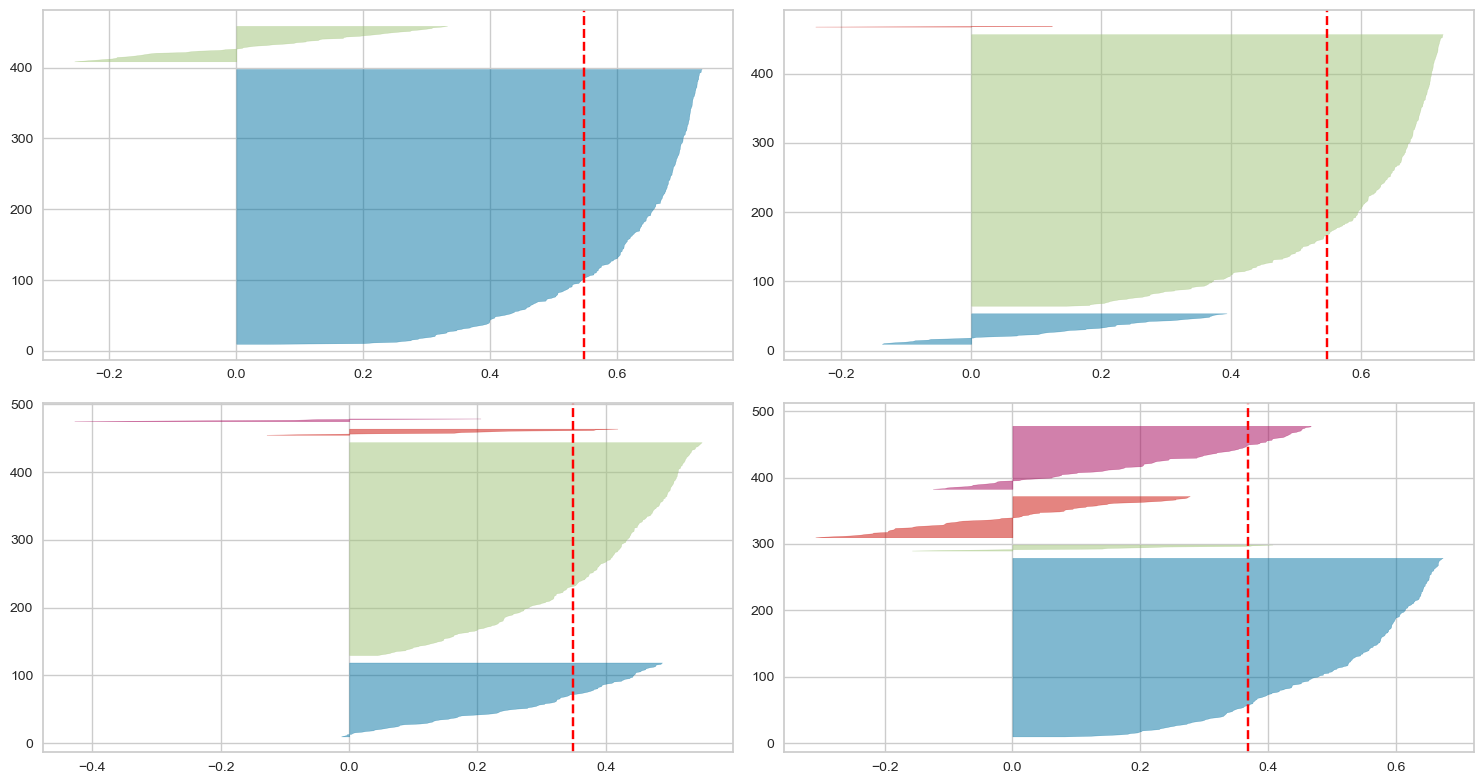

In [77]:
!pip install yellowbrick

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
import pandas as pd
import matplotlib.pyplot as plt

# Load the Wholesale Customers dataset
file_path = r"C:\Users\sombe\Downloads\Wholesale customers data.csv"
Wholesale_customers_df = pd.read_csv(file_path)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(Wholesale_customers_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

# Setting up the matplotlib figure with multiple subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

# Loop through different numbers of clusters (from 2 to 5)
for i, k in enumerate([2, 3, 4, 5]):
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)

    # Determine the position of the subplot
    q, mod = divmod(i, 2)

    # Create a SilhouetteVisualizer with the KMeans instance
    # Colors are set to 'yellowbrick' palette, and the subplot ax is defined
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])

    # Fit the visualizer to the data to produce the silhouette plot
    visualizer.fit(X)

    
# Display the plot
plt.tight_layout()
plt.show()

# Your code here:

### Looking to the elbow we can choose 2 like the correct number of clusters

C:\Users\sombe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sombe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sombe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sombe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

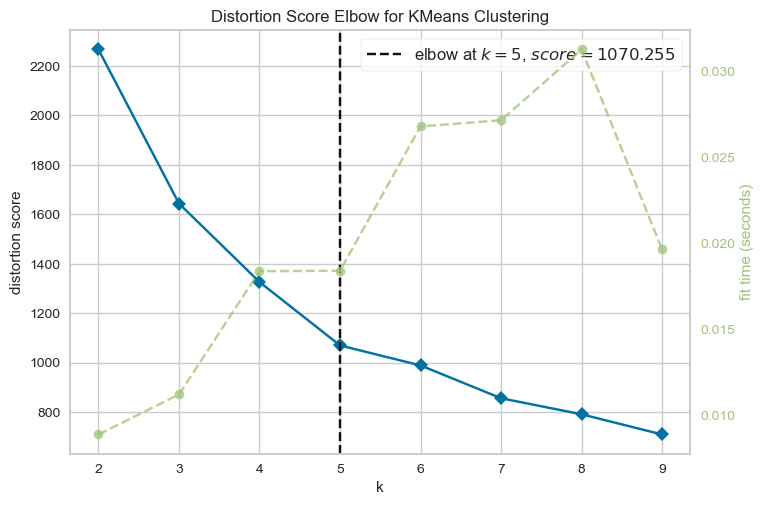

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KMeans model
km = KMeans(random_state=42)

# Instantiate the KElbowVisualizer
# k=(2,10) sets the range of clusters to evaluate (from 2 to 10)
visualizer = KElbowVisualizer(km, k=(2, 10))

# Fit the visualizer to the data
visualizer.fit(X)

# Render the elbow plot
visualizer.show()

In [93]:
print(len(customers_scale))  # Length of scaled data
print(len(Wholesale_customers_df))  # Length of the original DataFrame

print(customers_scale.shape)
print(Wholesale_customers_df.shape)

data_to_scale = Wholesale_customers_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
customers_scale = scaler.fit_transform(data_to_scale)


332
440
(332, 6)
(440, 8)


In [95]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

Wholesale_customers_df['Cluster'] = clusters
print(Wholesale_customers_df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        0  
1        1776        0  
2        7844        0  
3        1788        0  
4        5185        0  


C:\Users\sombe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [103]:
clean_customers = Wholesale_customers_df.copy()  # Create a copy of the original DataFrame

clean_customers['Label'] = clusters

print(len(clusters))  # Length of clusters
print(len(clean_customers))  # Number of rows in clean_customers


440
440


Count the values in `labels`.

In [105]:
# Your code here:

from collections import Counter

# Count the values in labels
label_counts = Counter(labels)
print(label_counts)


Counter({0: 389, 1: 51})


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [107]:
from sklearn.cluster import DBSCAN 

# Your code here
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with eps=0.5
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN to the scaled data
dbscan.fit(customers_scale)

# Assign DBSCAN labels to the DataFrame
Wholesale_customers_df['labels_DBSCAN'] = dbscan.labels_

# Display the first few rows of the updated DataFrame
print(Wholesale_customers_df.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  labels_DBSCAN  
0        1338        0              0  
1        1776        0              0  
2        7844        0             -1  
3        1788        0              0  
4        5185        0             -1  


Count the values in `labels_DBSCAN`.

In [109]:
# Your code here
print(Wholesale_customers_df['labels_DBSCAN'].value_counts())


labels_DBSCAN
 0    261
-1    174
 1      5
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [111]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

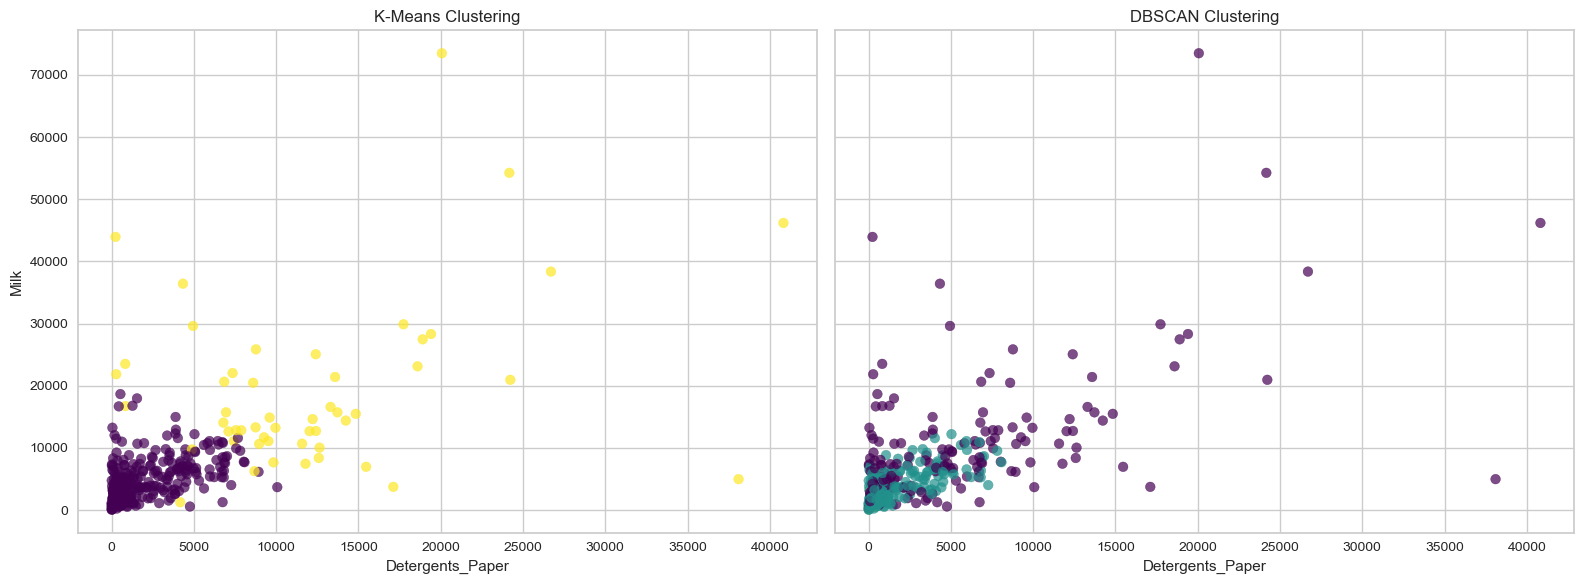

In [113]:
# Your code here:

import matplotlib.pyplot as plt

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# K-Means clustering visualization
axes[0].scatter(Wholesale_customers_df['Detergents_Paper'], Wholesale_customers_df['Milk'], 
                c=Wholesale_customers_df['Cluster'], cmap='viridis', alpha=0.7)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Detergents_Paper')
axes[0].set_ylabel('Milk')

# DBSCAN clustering visualization
axes[1].scatter(Wholesale_customers_df['Detergents_Paper'], Wholesale_customers_df['Milk'], 
                c=Wholesale_customers_df['labels_DBSCAN'], cmap='viridis', alpha=0.7)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Detergents_Paper')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

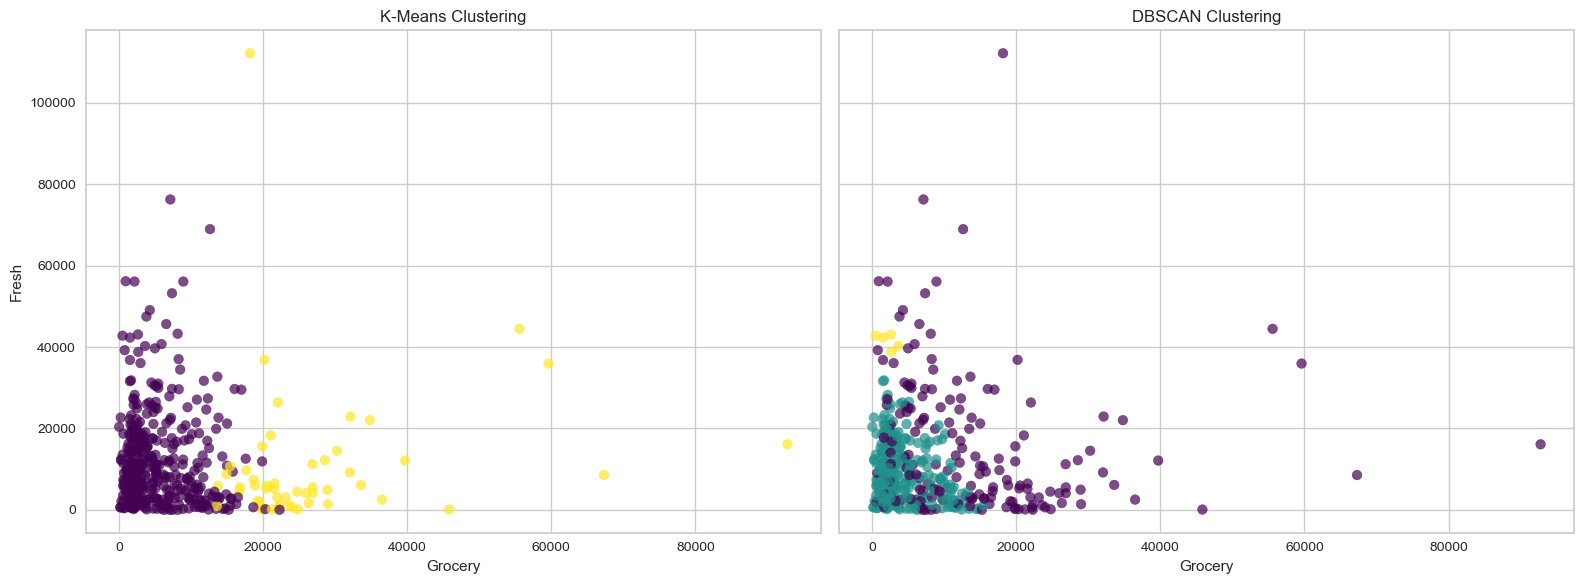

In [116]:
# Your code here: 

import matplotlib.pyplot as plt

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# K-Means clustering visualization
axes[0].scatter(Wholesale_customers_df['Grocery'], Wholesale_customers_df['Fresh'], 
                c=Wholesale_customers_df['Cluster'], cmap='viridis', alpha=0.7)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Grocery')
axes[0].set_ylabel('Fresh')

# DBSCAN clustering visualization
axes[1].scatter(Wholesale_customers_df['Grocery'], Wholesale_customers_df['Fresh'], 
                c=Wholesale_customers_df['labels_DBSCAN'], cmap='viridis', alpha=0.7)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Grocery')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

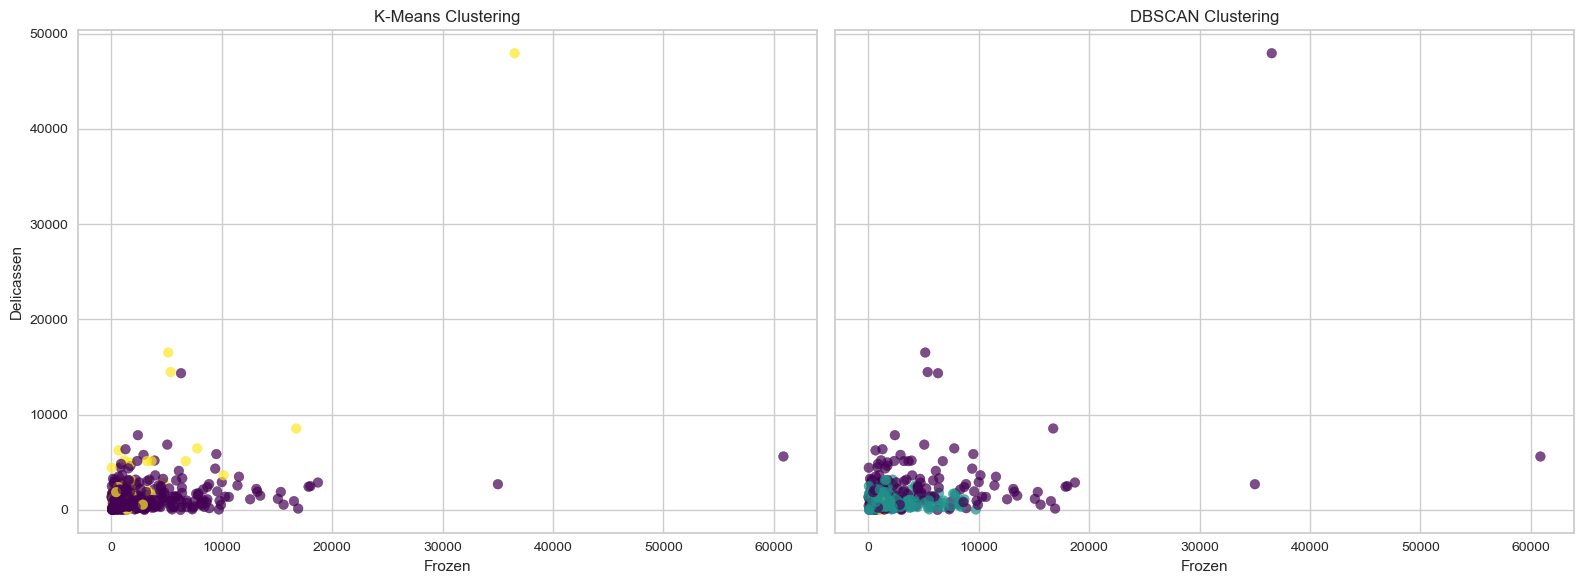

In [118]:
# Your code here:

import matplotlib.pyplot as plt

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# K-Means clustering visualization
axes[0].scatter(Wholesale_customers_df['Frozen'], Wholesale_customers_df['Delicassen'], 
                c=Wholesale_customers_df['Cluster'], cmap='viridis', alpha=0.7)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Frozen')
axes[0].set_ylabel('Delicassen')

# DBSCAN clustering visualization
axes[1].scatter(Wholesale_customers_df['Frozen'], Wholesale_customers_df['Delicassen'], 
                c=Wholesale_customers_df['labels_DBSCAN'], cmap='viridis', alpha=0.7)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Frozen')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [120]:
# Your code here:

# Group by K-Means labels and compute the mean for all columns
kmeans_means = Wholesale_customers_df.groupby('Cluster').mean()
print("K-Means Group Means:")
print(kmeans_means)


# Group by DBSCAN labels and compute the mean for all columns
dbscan_means = Wholesale_customers_df.groupby('labels_DBSCAN').mean()
print("\nDBSCAN Group Means:")
print(dbscan_means)


K-Means Group Means:
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.246787  2.550129  12157.300771   4028.169666   5402.722365   
1        1.901961  2.490196  10802.764706  19282.333333  27390.254902   

              Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
Cluster                                                             
0        3066.066838       1667.688946  1256.894602      -0.303342  
1        3116.666667      12139.725490  3568.843137      -1.000000  

DBSCAN Group Means:
                Channel    Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                 
-1             1.522989  2.551724  15608.988506  10000.408046  13693.298851   
 0             1.195402  2.528736   9030.398467   3077.318008   4234.061303   
 1             1.000000  3.000000  41446.600000   1421.200000   2167.6000

Which algorithm appears to perform better?

**Your observations here**

- DBSCAN performs better because it identifies outliers, and it captures clusters with irregular shapes.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 